In [2]:
import Bio

In [3]:
"../procesed/STING_aln.fasta"

'../procesed/STING_aln.fasta'

In [4]:
from Bio import AlignIO
from Bio.Align import substitution_matrices
import numpy as np

alignment = AlignIO.read("../procesed/STING_aln.fasta", "fasta")
records = [record for record in alignment]
print(len(records))
print(records)

9
[SeqRecord(seq=Seq('MPQDPSTRSSPARLLIPEPRAGRARHAACVLLAVCFVVLFLSGEPLAPIIRSVC...DCP'), id='E1C7U0.2', name='E1C7U0.2', description='E1C7U0.2 RecName: Full=Stimulator of interferon genes protein; Short=STING; AltName: Full=Transmembrane protein 173 [Gallus gallus]', dbxrefs=[]), SeqRecord(seq=Seq('------MPYSNLHPAIPRPRGHRSKYVALIFLVASLMILWVAKDPPNHTLKYLA...DLI'), id='Q3TBT3.2', name='Q3TBT3.2', description='Q3TBT3.2 RecName: Full=Stimulator of interferon genes protein; Short=mSTING; AltName: Full=Endoplasmic reticulum interferon stimulator;', dbxrefs=[]), SeqRecord(seq=Seq('------MPYSNLHPSIPRPRSYRFKLAAFVLLVGSLMSLWMTGEPPSHTLHYLA...DLI'), id='F1M391.2', name='F1M391.2', description='F1M391.2 RecName: Full=Stimulator of interferon genes protein; Short=rSTING; AltName: Full=Transmembrane protein 173 [Rattus norvegicus]', dbxrefs=[]), SeqRecord(seq=Seq('------MPHSSLHPSIPRPRGHRAKKAAFVLLSTCLAALWELGEPADHILRWLV...DVF'), id='A0A291NUI4.1', name='A0A291NUI4.1', description='A0A291NUI4.1 RecName: Full=

In [5]:
aln_len = sum(a != '-' for a in alignment[0])

In [6]:
identity_mat = np.array([[sum([a == b and a != '-' for a, b in zip(p1, p2)])/aln_len for p2 in alignment] for p1 in alignment])

In [7]:
import matplotlib.pyplot as plt

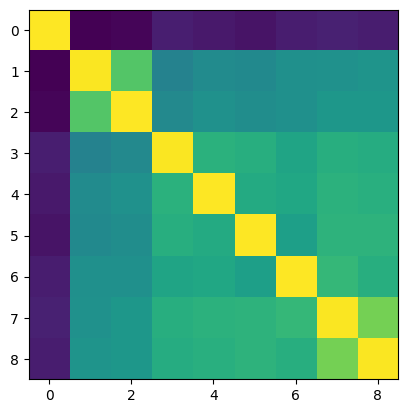

In [8]:
plt.imshow(identity_mat)

In [9]:
identity_mat

array([[1.        , 0.37730871, 0.38522427, 0.43007916, 0.41952507,
        0.40897098, 0.42744063, 0.4353562 , 0.42744063],
       [0.37730871, 0.99736148, 0.83377309, 0.65435356, 0.67810026,
        0.67282322, 0.68865435, 0.69129288, 0.69920844],
       [0.38522427, 0.83377309, 1.        , 0.6701847 , 0.69129288,
        0.68337731, 0.68865435, 0.70712401, 0.70712401],
       [0.43007916, 0.65435356, 0.6701847 , 0.99736148, 0.77572559,
        0.76781003, 0.7414248 , 0.76781003, 0.76253298],
       [0.41952507, 0.67810026, 0.69129288, 0.77572559, 1.        ,
        0.75725594, 0.74934037, 0.77836412, 0.77044855],
       [0.40897098, 0.67282322, 0.68337731, 0.76781003, 0.75725594,
        1.        , 0.72823219, 0.78100264, 0.78100264],
       [0.42744063, 0.68865435, 0.68865435, 0.7414248 , 0.74934037,
        0.72823219, 1.        , 0.79155673, 0.76781003],
       [0.4353562 , 0.69129288, 0.70712401, 0.76781003, 0.77836412,
        0.78100264, 0.79155673, 0.99736148, 0.8707124 ],


In [10]:
for record in alignment:
    print(record.description)

E1C7U0.2 RecName: Full=Stimulator of interferon genes protein; Short=STING; AltName: Full=Transmembrane protein 173 [Gallus gallus]
Q3TBT3.2 RecName: Full=Stimulator of interferon genes protein; Short=mSTING; AltName: Full=Endoplasmic reticulum interferon stimulator;
F1M391.2 RecName: Full=Stimulator of interferon genes protein; Short=rSTING; AltName: Full=Transmembrane protein 173 [Rattus norvegicus]
A0A291NUI4.1 RecName: Full=Stimulator of interferon genes protein; Short=STING [Rhinolophus ferrumequinum]
A0A291NUG3.1 RecName: Full=Stimulator of interferon genes protein; Short=STING [Pteronotus parnellii]
A0A291NUI5.1 RecName: Full=Stimulator of interferon genes protein; Short=STING [Eidolon helvum]
sp|Q86WV6|STING_HUMAN Stimulator of interferon genes protein OS=Homo sapiens OX=9606 GN=STING1 PE=1 SV=1
Q2KI99.1 RecName: Full=Stimulator of interferon genes protein; Short=STING; AltName: Full=Transmembrane protein 173 [Bos taurus]
B8XX90.1 RecName: Full=Stimulator of interferon genes pr

In [11]:
import re

def extract_species_name(description):
    """
    Extract species name from different UniProt-like description formats.
    
    Parameters:
    description (str): Full description line from a FASTA file
    
    Returns:
    str: Extracted species name
    """
    # Handle UniProt-style OS= format first
    uniprot_match = re.search(r'OS=([^O]+)', description)
    if uniprot_match:
        return uniprot_match.group(1).strip()
    
    # Handle [Species name] format
    bracket_match = re.search(r'\[([^]]+)\]', description)
    if bracket_match:
        return bracket_match.group(1).strip()
    
    # If no specific format matches, return None or a default
    return "Unknown"

In [12]:
species = {}
for record in alignment:
    species[record.id] = extract_species_name(record.description)

In [13]:
species['Q3TBT3.2'] = 'Mus musculus'

In [14]:
species

{'E1C7U0.2': 'Gallus gallus',
 'Q3TBT3.2': 'Mus musculus',
 'F1M391.2': 'Rattus norvegicus',
 'A0A291NUI4.1': 'Rhinolophus ferrumequinum',
 'A0A291NUG3.1': 'Pteronotus parnellii',
 'A0A291NUI5.1': 'Eidolon helvum',
 'sp|Q86WV6|STING_HUMAN': 'Homo sapiens',
 'Q2KI99.1': 'Bos taurus',
 'B8XX90.1': 'Sus scrofa'}

In [15]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_similarity_matrix(similarity_matrix, alignment, species_dict):
    """
    Plot a similarity matrix with species names as labels.
    
    Parameters:
    -----------
    similarity_matrix : numpy.ndarray
        2D numpy array containing similarity scores
    alignment : MultipleSeqAlignment
        Biopython alignment object
    species_dict : dict
        Dictionary mapping record IDs to species names
    
    Returns:
    --------with species names as labels.
    
    matplotlib.figure.Figure
        The created figure object
    """
    # Create a new figure with appropriate size
    plt.figure(figsize=(10, 8))
    
    # Use seaborn for a more aesthetically pleasing heatmap
    sns.heatmap(similarity_matrix, 
                annot=True,  # Show numeric values in each cell
                cmap='YlGnBu',  # Color palette
                cbar_kws={'label': 'Similarity Score'},
                square=True)  # Ensure square cells
    
    # Create labels using species names
    record_labels = [species_dict.get(record.id, record.id) for record in alignment]
    
    # Set x and y tick labels to species names
    plt.xticks(np.arange(len(record_labels)) + 0.5, record_labels, rotation=45, ha='right')
    plt.yticks(np.arange(len(record_labels)) + 0.5, record_labels, rotation=0)
    
    plt.title('Similarity Matrix with Species')
    plt.tight_layout()  # Adjust layout to prevent cutting off labels


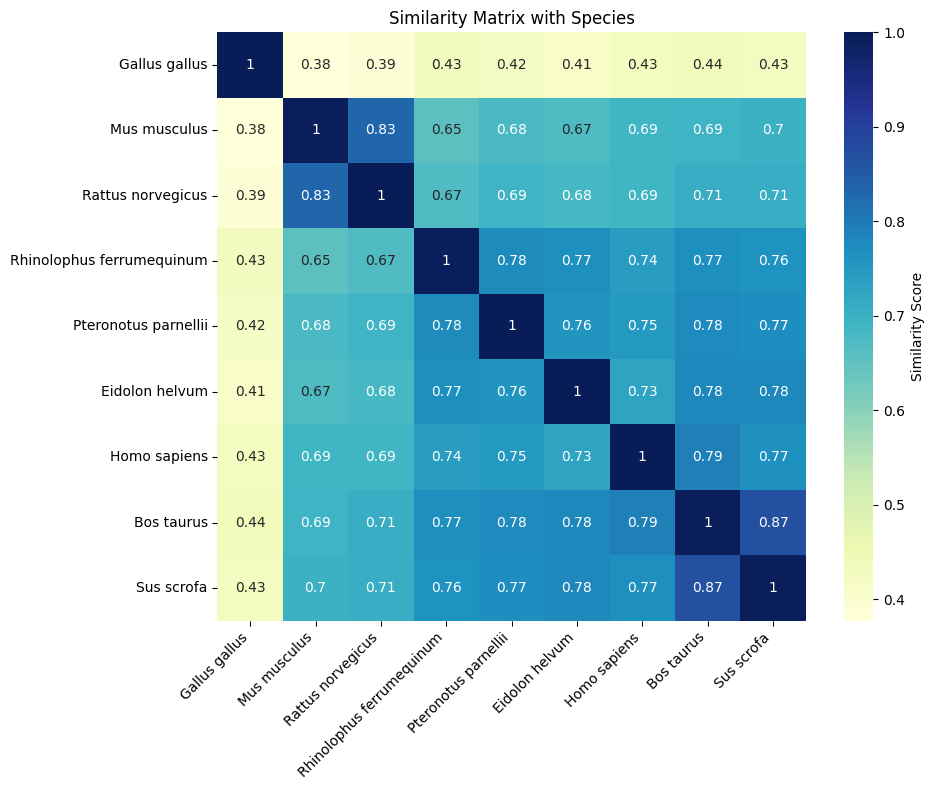

In [17]:
plot_similarity_matrix(identity_mat, alignment, species)

In [18]:
print(alignment)

Alignment with 9 rows and 385 columns
MPQDPSTRSSPARLLIPEPRAGRARHAACVLLAVCFVVLFLSGE...DCP E1C7U0.2
------MPYSNLHPAIPRPRGHRSKYVALIFLVASLMILWVAKD...DLI Q3TBT3.2
------MPYSNLHPSIPRPRSYRFKLAAFVLLVGSLMSLWMTGE...DLI F1M391.2
------MPHSSLHPSIPRPRGHRAKKAAFVLLSTCLAALWELGE...DVF A0A291NUI4.1
------MLHSSLHPSIPQPRGRRAKKAAFVLLSVCLVVLWDLGE...DVF A0A291NUG3.1
------MSHSSLHPSIPWPRGHKAKVAAFVLLIVCLAALWKLGE...DIF A0A291NUI5.1
------MPHSSLHPSIPCPRGHGAQKAALVLLSACLVTLWGLGE...DFS sp|Q86WV6|STING_HUMAN
------MPHSSLHPSIPQPRGLRAQKAALVLLSACLVALWGLGE...DVF Q2KI99.1
------MPYSSLHPSIPQPRGLRAQVAALVLLGACLVALWGLGE...DIF B8XX90.1


In [19]:
print(str(alignment[7].seq))

------MPHSSLHPSIPQPRGLRAQKAALVLLSACLVALWGLGEPPDYTLKWLVLHLASQQMGLLIKGICSLAEELCHVHSRYHGSYWRAVRACLCSSMRCGALLLLSCYFYCSLPNMADLPFTWMLALLGLSQALNILLGLQGLAPAEVSAICEKRNFNVAHGLAWSYYIGYLRLILPGLPARIQIYNQFHNNTLQGAGSHRLHILFPLDCGVPDDLNVADPNIRFLHELPQQSADRAGIKGRVYTNSIYELLENGQRAGVCVLEYATPLQTLFAMSQDGRAGFSREDRLEQAKLFCRTLEDILANAPESQNNCRLIVYQEPAEGSSFSLSQEILQHLRQEER-EVTMGSTETSVMPGSSVLSQEPELLISGLEKPLPLRSDVF


In [20]:
posiciones = range(376, len(alignment[7]) - 2)
print([alignment[7].seq[pos] for pos in posiciones])

['P', 'L', 'P', 'L', 'R', 'S', 'D']


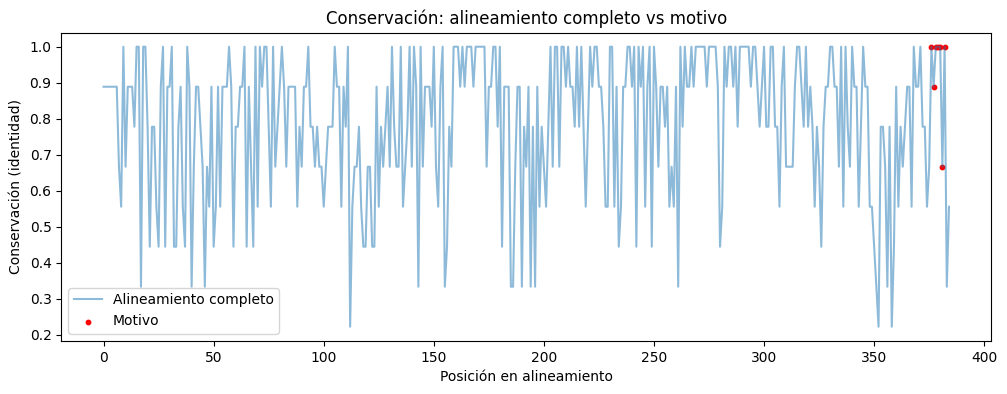

Conservación media alineamiento completo: 79.25%
Conservación media motivo: 93.65%


In [21]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# 1) Conservation function
def conservation_at_column(column):
    counts = Counter(column)
    return counts.most_common(1)[0][1] / len(column)

# 2) Compute full‐alignment conservation
n_cols = len(next(iter(alignment)))
full_cons = [
    conservation_at_column([seq[col] for seq in alignment])
    for col in range(n_cols)
]

# 3) Map your human positions and get their conservation
mapped = posiciones
selected_cons = [full_cons[i] for i in mapped]

# 4) Plot comparison
plt.figure(figsize=(12,4))
plt.plot(full_cons, label='Alineamiento completo', alpha=0.5)

plt.scatter(mapped, selected_cons, color='red', label='Motivo', s=10)
# plt.hlines(selected_cons, mapped, np.array(mapped)+1,
#           color='green', linewidth=2, label='Conservación selec.')
plt.legend()
plt.xlabel('Posición en alineamiento')
plt.ylabel('Conservación (identidad)')
plt.title('Conservación: alineamiento completo vs motivo')
plt.show()
mean_full = np.mean(full_cons)
mean_sel  = np.mean(selected_cons)

print(f'Conservación media alineamiento completo: {mean_full*100:.2f}%')
print(f'Conservación media motivo: {mean_sel*100:.2f}%')

In [44]:
fasta = ""
for prot in alignment:
    entry = f">{prot.id}--{species[prot.id].replace(' ', '-')}\n{prot.seq}\n"
    fasta += entry

In [45]:
print(fasta)

>E1C7U0.2--Gallus-gallus
MPQDPSTRSSPARLLIPEPRAGRARHAACVLLAVCFVVLFLSGEPLAPIIRSVCTQLAALQLGVLLKGCCCLAEEIFHLHSRHHGSLWQVLCSCFPP-RWYLALLLVGGSAYLDPPEDNGHSPRLALTLSCLCQLLVLALGLQKLSAVEVSELTESSKKNVAHGLAWSYYIGYLKVVLPRLKECMEELSRTNPMLRAHRDTWKLHILVPLGCDIWDDLEKADSNIQYLADLPETILTRAGIKRRVYKHSLYVIRDKDNKLRPCVLEFASPLQTLCAMSQDDCAAFSREQRLEQARLFYRSLRDILGSSKECAGLYRLIAYEEPAEPESHFLSGLILWHLQQQQREEYMVQEELPL-----GTSSVELSLQVSSSDLPQPLRSDCP
>Q3TBT3.2--Mus-musculus
------MPYSNLHPAIPRPRGHRSKYVALIFLVASLMILWVAKDPPNHTLKYLALHLASHELGLLLKNLCCLAEELCHVQSRYQGSYWKAVRACLGCPIHCMAMILLSSYFYF-LQNTADIYLSWMFGLLVLYKSLSMLLGLQSLTPAEVSAVCEEKKLNVAHGLAWSYYIGYLRLILPGLQARIRMFNQLHNNMLSGAGSRRLYILFPLDCGVPDNLSVVDPNIRFRDMLPQQNIDRAGIKNRVYSNSVYEILENGQPAGVCILEYATPLQTLFAMSQDAKAGFSREDRLEQAKLFCRTLEEILEDVPESRNNCRLIVYQEPTDGNSFSLSQEVLRHIRQEEKEEVTMNAPMTSVAPPPSVLSQEPRLLISGMDQPLPLRTDLI
>F1M391.2--Rattus-norvegicus
------MPYSNLHPSIPRPRSYRFKLAAFVLLVGSLMSLWMTGEPPSHTLHYLALHVASQQLGLLLKKLCCLAEELCHVQSRYQGSYWKAVRACVGSPICFMALILLSFYFYCSLENTSDLRLAWHLGILVLSKSLSMTLDLQSLAPAEV

In [49]:
with open("../procesed/STING_aln_species.fasta", 'w') as f:
    f.write(fasta)